# ICA PCA
Criado por: Nielsen C. Damasceno Dantas

Area demandante:

Data de criacao: 10/04/2023

_______

Data de ultima modificacao: 


Log de mudancas:

                    

______

Requeriments:


## Importando as bibliotecas

In [2]:
import pandas as pd
import numpy as np
import warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

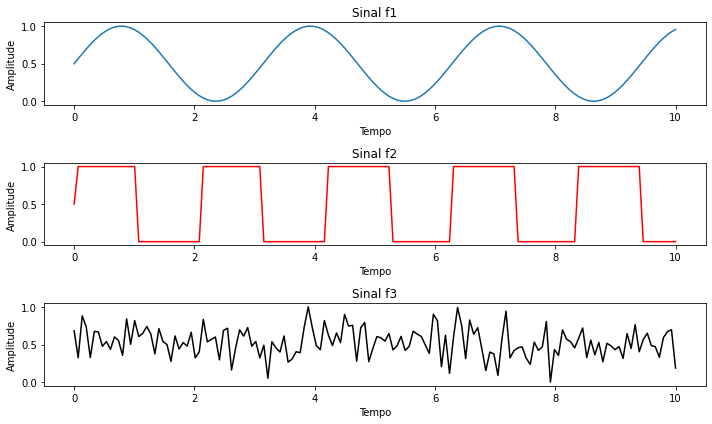

In [100]:
N = 150
t = np.linspace(0, 10, N)  # gera N pontos entre 0 e 10

# Cria 3 sinais
f1 = np.sin(2 * t)
f1 = (f1 - np.min(f1)) / (np.max(f1) - np.min(f1))  # Normalização
f2 = np.sign(np.sin(3 * t))
f2 = (f2 - np.min(f2)) / (np.max(f2) - np.min(f2))  # Normalização
f3 = 0.5 * np.random.randn(N)
f3 = (f3 - np.min(f3)) / (np.max(f3) - np.min(f3))  # Normalização

# Plotagem dos sinais normalizados
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(t, f1)
plt.title('Sinal f1')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.plot(t, f2, 'r')
plt.title('Sinal f2')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)
plt.plot(t, f3, 'k')
plt.title('Sinal f3')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


In [101]:
# Gera uma matriz aleatória a com dimensão 3x3
a = np.random.rand(3, 3)
s = np.column_stack((f1, f2, f3))
# Realiza a mistura para ICA
x = np.dot(s, a)

In [102]:
a

array([[0.24874033, 0.07563553, 0.23642111],
       [0.98858618, 0.74300381, 0.20457729],
       [0.62479014, 0.83987273, 0.36311163]])

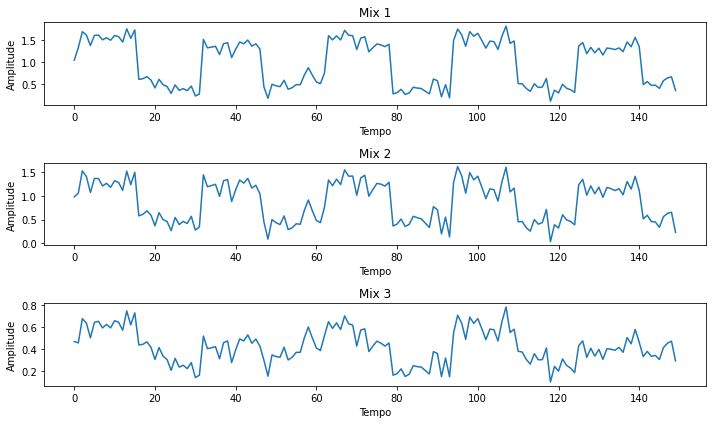

In [103]:
# Plotagem do gráfico de cada componente em subplots separados
plt.figure(figsize=(10, 6))

for i in range(3):
    plt.subplot(3, 1, i+1)
    plt.plot(x[:, i])
    plt.title(f'Mix {i + 1}')
    plt.xlabel('Tempo')
    plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

In [108]:
import numpy as np

def pca_ica(x):
    n, d = x.shape

    # Whitening
    cov_x = np.cov(x.T)
    eig_vals, eig_vecs = np.linalg.eig(cov_x)
    E = eig_vecs
    D = np.diag(eig_vals**(-0.5))
    
    v = np.dot(np.dot(np.dot(E, D), E.T), x.T)

    # Data transformation and ICA by PCA
    z = np.sqrt(np.sum(v**2, axis=0)) * v
    cov_z = np.cov(z)
    eig_vals, eig_vecs = np.linalg.eig(cov_z)
    EE = eig_vecs

    y = np.dot(EE.T, v)
    
    return y.T, EE.T  # Transpose y and EE to match MATLAB's column-wise storage

# Example usage


y, w = pca_ica(x)



In [96]:
y.shape

(50, 3)

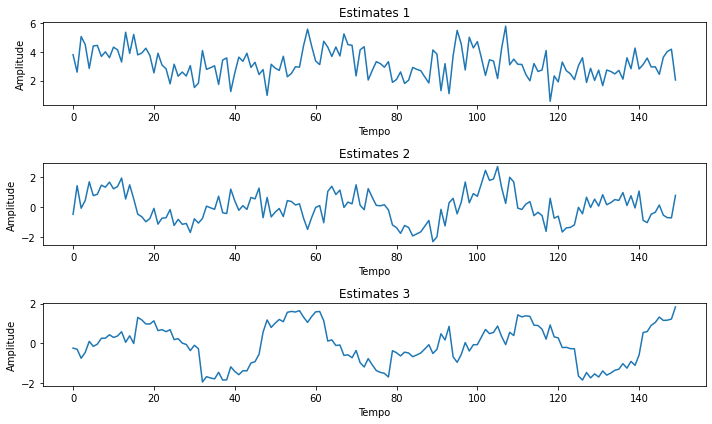

In [109]:
# Plotagem do gráfico de cada componente em subplots separados
plt.figure(figsize=(10, 6))

for i in range(3):
    plt.subplot(3, 1, i+1)
    plt.plot(y[:, i])
    plt.title(f'Estimates {i + 1}')
    plt.xlabel('Tempo')
    plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()